In [69]:
import pickle
import tqdm
import numpy as np
from PIL import Image
import imageio
import os
from pathlib import Path
import matplotlib.pyplot as plt
from changepoint_aug.density_estimation.utils import make_env
from changepoint_aug.density_estimation.data import load_pkl_dataset
import matplotlib.pyplot as plt
import numpy as np

In [86]:
np.random.seed(1)
out = load_pkl_dataset(
    data_dir="/scr/aliang80/changepoint_aug/changepoint_aug/density_estimation/datasets",
    data_file="sac_maze_200.pkl",
    num_trajs=10,
    batch_size=1,
    train_perc=0.9,
)
dataset = out[0]
selected_obs, act, obs_tp1, action_tp1, rew, done = dataset[:]
print(selected_obs.shape)

ckpt_dir = "/scr/aliang80/changepoint_aug/changepoint_aug/density_estimation/results/i022_bc_base_s-0_t-bc/logs"

metadata_files = list(Path(ckpt_dir).rglob("eval_rollouts_1000.pkl"))
print(metadata_files[-1])
for metadata_f in metadata_files:
    eval_rollout = pickle.load(open(metadata_f, "rb"))

    print(len(eval_rollout))
    break 

[58, 40, 34, 102, 184, 198, 95, 4, 29, 168]
torch.Size([1338, 11])
/scr/aliang80/changepoint_aug/changepoint_aug/density_estimation/results/i022_bc_base_s-0_t-bc/logs/eval_rollouts_1000.pkl
10


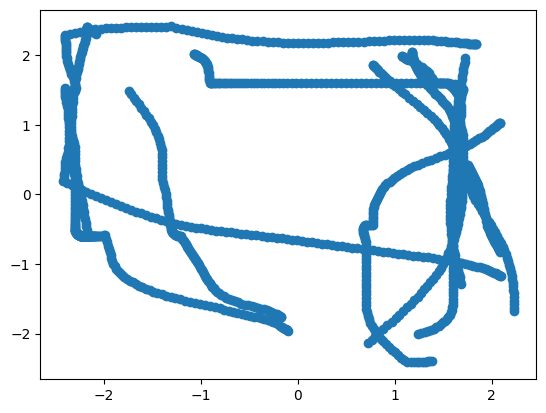

In [87]:
plt.scatter(selected_obs[:, 0], selected_obs[:, 1])

In [58]:
success_states = []
failure_states = []

for rollouts in eval_rollout:
    print(len(rollouts))
    success = rollouts[-1][-1]["success"]
    print(success)
    state = {k: v for k, v in rollouts[-1][0].items() if k != "achieved_goal"}
    state = np.concatenate(list(state.values()))
    if success:
        success_states.append(state)
    else:
        failure_states.append(state)
    
success_states = np.array(success_states)
failure_states = np.array(failure_states)
print(f"success states: {success_states.shape}")
print(f"failure states: {failure_states.shape}")

1000
False
1000
False
1000
False
189
True
1000
False
1000
False
156
True
1000
False
587
True
156
True
success states: (4, 11)
failure states: (6, 11)


In [59]:
print(failure_states)

[[ 7.02746686e-01  3.98445474e-01  4.89774406e-04 -1.01554035e-07
   1.14827723e-01  1.83782781e+00  2.00000000e+00  2.00000000e+00
   5.00000000e+00  2.00000000e+00  1.00000000e+00]
 [-8.91278418e-01  6.01623993e-01  3.32319750e-02 -3.68198748e-06
  -7.51395032e-01 -1.75958233e+00  3.00000000e+00  3.00000000e+00
   4.00000000e+00  3.00000000e+00  2.00000000e+00]
 [ 7.84175008e-01 -1.60160576e+00 -5.46528388e-08  6.23301136e-10
   3.57649154e-02  9.10934696e-01  4.00000000e+00  4.00000000e+00
   3.00000000e+00  4.00000000e+00  5.00000000e+00]
 [-1.27857859e-01  3.98502037e-01 -6.28725063e-08  1.52076128e-15
   2.08599744e+00  1.84975772e+00  2.00000000e+00  2.00000000e+00
   5.00000000e+00  2.00000000e+00  1.00000000e+00]
 [ 1.39069925e-01  3.98502037e-01 -7.50711420e-08  1.51397076e-15
   2.47548253e-01  2.22447184e+00  2.00000000e+00  2.00000000e+00
   3.00000000e+00  2.00000000e+00  1.00000000e+00]
 [ 6.72087651e-01 -1.60172752e+00  3.04648573e-05  4.03477770e-09
  -1.16934864e-01  

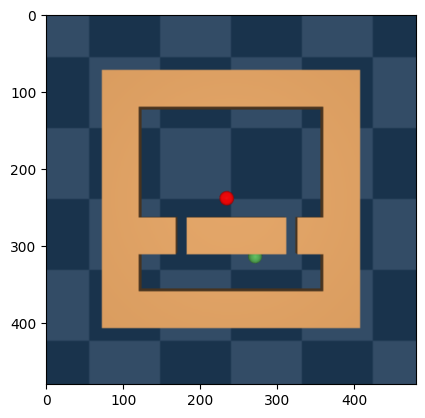

In [68]:
env = make_env(
    "MAZE",
    "",
    0,
    max_episode_steps=1000,
)
obs, _ = env.reset(seed=0)
env.reset_to_state(failure_states[5])
img = env.render()
plt.imshow(img)